In [21]:
# Import libraries and dependencies
import os
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime

from alpha_vantage.timeseries import TimeSeries
from ModifiedForecastTools import MCSimulation

# Import fuctions 
import api 
import user_inputs

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()


%matplotlib inline

In [11]:
api_key = "DK97BGD2FUMQXGZX"

In [12]:
tickers = user_inputs.get_user_input_tickers()
start = datetime.datetime(2019, 10, 1)
end = datetime.datetime(2023, 10, 1)

ts = TimeSeries(key=api_key, output_format='pandas')

# Initialize an empty dictionary to store data for each ticker
ticker_data = {}

# Retrieve data for each ticker and store it in the dictionary
for tick in tickers:
    data, meta_data = ts.get_daily(symbol=tick, outputsize='full')
    data = data[(data.index >= start) & (data.index <= end)]
    ticker_data[tick] = data

In [13]:
bac_data = ticker_data["BAC"]
C_data = ticker_data['C']
GS_data = ticker_data['GS']
jpm_data = ticker_data['JPM']
ms_data = ticker_data['MS']

column_names = {
    'BAC': 'BAC',
    'C': 'C',
    'GS': 'GS',
    'JPM': 'JPM',
    'MS': 'MS'
}

# Combine the data and assign column names
combined_data = pd.concat([bac_data, C_data, GS_data, jpm_data, ms_data], axis=1, keys=column_names)

In [14]:
combined_data.head(10)

BAC                                            C          \
           1. open 2. high  3. low 4. close   5. volume 1. open 2. high   
date                                                                      
2023-09-29   27.89  27.990  27.270    27.38  40645852.0  41.450  41.890   
2023-09-28   27.17  27.640  27.170    27.56  36734311.0  40.475  41.350   
2023-09-27   27.23  27.610  27.065    27.27  38296345.0  40.290  40.630   
2023-09-26   27.34  27.500  27.010    27.17  42237433.0  40.670  41.040   
2023-09-25   27.50  27.620  27.350    27.60  32749158.0  40.750  41.085   
2023-09-22   28.07  28.185  27.600    27.64  41284443.0  41.750  41.860   
2023-09-21   28.36  28.585  28.020    28.05  39906011.0  42.060  42.360   
2023-09-20   28.81  28.970  28.530    28.55  26641101.0  42.950  43.130   
2023-09-19   28.76  28.940  28.510    28.65  34888054.0  42.790  42.860   
2023-09-18   28.80  28.800  28.490    28.76  25752313.0  42.600  42.775   

                                         ...     JPM                     \
            3. low 4. close   5. volume  ... 1. open  2. high    3. low   
date                                     ...                              
2023-09-29  40.925    41.13  16916101.0  ...  148.60  148.760  144.8600   
2023-09-28  40.410    41.20  14409840.0  ...  146.28  148.870  146.0100   
2023-09-27  39.940    40.46  15083441.0  ...  145.19  146.090  144.5115   
2023-09-26  40.060    40.22  21786462.0  ...  144.60  145.840  144.2300   
2023-09-25  40.580    41.02  10866751.0  ...  145.35  146.520  143.7000   
2023-09-22  40.860    40.92  15443678.0  ...  147.29  147.510  145.1900   
2023-09-21  41.690    41.71  12266870.0  ...  147.58  148.855  146.6300   
2023-09-20  42.270    42.30  11240683.0  ...  149.65  150.250  148.1350   
2023-09-19  42.470    42.68  11039494.0  ...  149.50  149.720  147.2100   
2023-09-18  42.400    42.64  10467376.0  ...  148.16  149.140  147.7500   

                                     MS                                        
           4. close   5. volume 1. open  2. high   3. low 4. close  5. volume  
date                                                                           
2023-09-29   145.02  11917826.0   83.01  83.0900  81.0250    81.67  6830468.0  
2023-09-28   147.59   8868063.0   81.48  82.5450  81.4500    82.19  5665377.0  
2023-09-27   145.78   6717822.0   82.41  82.6100  81.0900    81.65  5708017.0  
2023-09-26   144.93   7468405.0   82.08  82.7721  81.7214    82.17  5557145.0  
2023-09-25   146.45   7044672.0   82.63  83.2800  82.3000    83.03  4748891.0  
2023-09-22   145.73   7071975.0   85.23  85.2300  83.0050    83.29  7421222.0  
2023-09-21   147.14   8053410.0   86.34  86.5100  84.8300    84.88  6935603.0  
2023-09-20   148.30   7334257.0   88.83  89.1500  87.0600    87.14  5269810.0  
2023-09-19   148.93   7945606.0   88.78  89.4700  87.9400    88.51  5769369.0  
2023-09-18   149.12   6512360.0   88.57  89.0500  87.5500    88.71  5501891.0  

[10 rows x 25 columns]

In [15]:
df_closing_prices = pd.DataFrame()
df_closing_prices["BAC"] = combined_data["BAC"]["4. close"]
df_closing_prices["C"] = combined_data["C"]["4. close"]
df_closing_prices["GS"] = combined_data["GS"]["4. close"]
df_closing_prices["JPM"] = combined_data["JPM"]["4. close"]
df_closing_prices["MS"] = combined_data["MS"]["4. close"]

In [16]:
df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.head(10)

,BAC,C,GS,JPM,MS
date,,,,,
2023-09-28,0.006574,0.001702,0.005038,0.017722,0.006367
2023-09-27,-0.010522,-0.017961,-0.009994,-0.012264,-0.006570
2023-09-26,-0.003667,-0.005932,0.005808,-0.005831,0.006369
2023-09-25,0.015826,0.019891,0.015502,0.010488,0.010466
2023-09-22,0.001449,-0.002438,-0.002889,-0.004916,0.003131
2023-09-21,0.014834,0.019306,0.007167,0.009675,0.019090
2023-09-20,0.017825,0.014145,0.019562,0.007884,0.026626
2023-09-19,0.003503,0.008983,0.015414,0.004248,0.015722
2023-09-18,0.003839,-0.000937,0.004183,0.001276,0.002260


In [17]:
df_daily_returns.describe()

,BAC,C,GS,JPM,MS
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.000321,0.000851,-0.000229,0.000009,-0.000404
std,0.023846,0.026609,0.021771,0.021738,0.023348
min,-0.151076,-0.152429,-0.149517,-0.152632,-0.165067
25%,-0.011265,-0.011269,-0.011794,-0.010365,-0.011994
50%,-0.000143,0.000415,0.000070,-0.000101,-0.000550
75%,0.012214,0.012701,0.010775,0.009934,0.010448
max,0.181996,0.239136,0.145545,0.175985,0.184834


<AxesSubplot:ylabel='Frequency'>

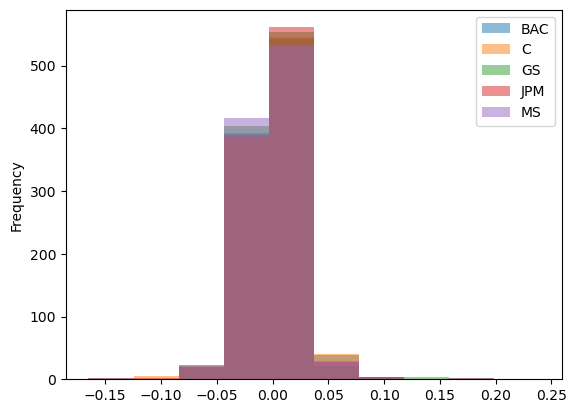

In [18]:
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

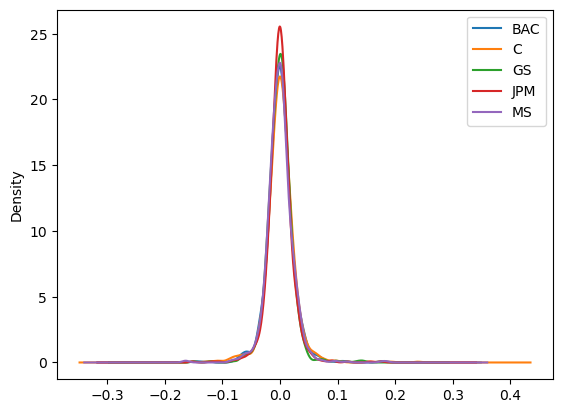

In [19]:
df_daily_returns.plot.density()

In [22]:
year = user_inputs.year()
trading_days= 252
num_trading_days = year * trading_days
assets_weight = user_inputs.weights()
simulation = user_inputs.num_simulations(),

MC_fiveyear = MCSimulation(
    portfolio_data = df_daily_returns,
    weights = assets_weight,
    num_simulation = simulation,
    num_trading_days = year * trading_days
)

ValueError: invalid literal for int() with base 10: ''

TypeError: 'float' object cannot be interpreted as an integer